In [2]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense,Flatten
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.optimizers import Adam
import matplotlib.pyplot as plt

In [8]:
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3373s 20us/step


In [9]:
#preprocessing
y_train_cat=to_categorical(y_train)
y_test_cat=to_categorical(y_test)

In [12]:
#build the architecture
model=Sequential()
model.add(Flatten(input_shape=(32,32,3)))
model.add(Dense(1024,activation='relu'))
model.add(Dense(512,activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [15]:
model.compile(optimizer=Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [16]:
result=model.fit(x_train,y_train_cat,epochs=50,batch_size=64,validation_split=0.2)

Epoch 1/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 44s 67ms/step - accuracy: 0.2401 - loss: 7.2324 - val_accuracy: 0.2782 - val_loss: 3.0139
Epoch 2/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 42s 66ms/step - accuracy: 0.3058 - loss: 2.7009 - val_accuracy: 0.3152 - val_loss: 2.3709
Epoch 3/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 42s 68ms/step - accuracy: 0.3458 - loss: 2.1323 - val_accuracy: 0.3390 - val_loss: 2.1039
Epoch 4/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 42s 67ms/step - accuracy: 0.3758 - loss: 1.9300 - val_accuracy: 0.3734 - val_loss: 1.8865
Epoch 5/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 44s 70ms/step - accuracy: 0.3946 - loss: 1.8065 - val_accuracy: 0.3810 - val_loss: 1.8680
Epoch 6/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 43s 69ms/step - accuracy: 0.4179 - loss: 1.7013 - val_accuracy: 0.3946 - val_loss: 1.7299
Epoch 7/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 43s 69ms/step - accuracy: 0.4251 - loss: 1.6653 - val_accuracy: 0.4069 - val_loss: 1.7776
Epoch 8/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 44s 71ms/step - accuracy: 0.4355 - loss: 1.6111 - 

In [17]:
loss,test_accuracy=model.evaluate(x_test,y_test_cat)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.4979 - loss: 2.0159


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step
predicted label:1


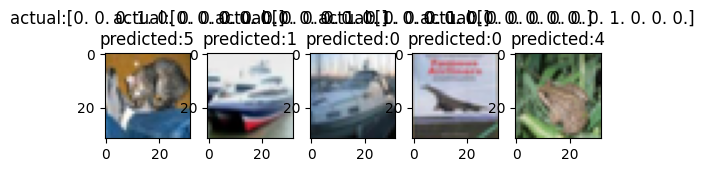

In [18]:
predictions=model.predict(x_test)
predict_label=np.argmax(predictions,axis=1)
print(f"predicted label:{predict_label[1]}")

#Print the predicted image
for i in range(5):
    #print(f"actual:{y_test[i]}\npredicted:{predict_label[i]}")
    plt.subplot(1,5,i+1)
    plt.imshow(x_test[i])
    plt.title(f"actual:{y_test_cat[i]}\npredicted:{predict_label[i]}")
plt.show()

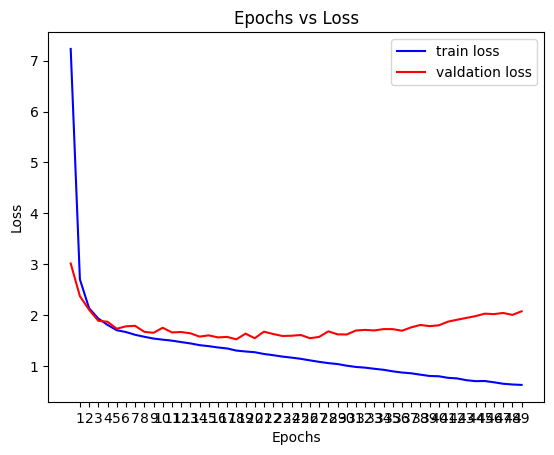

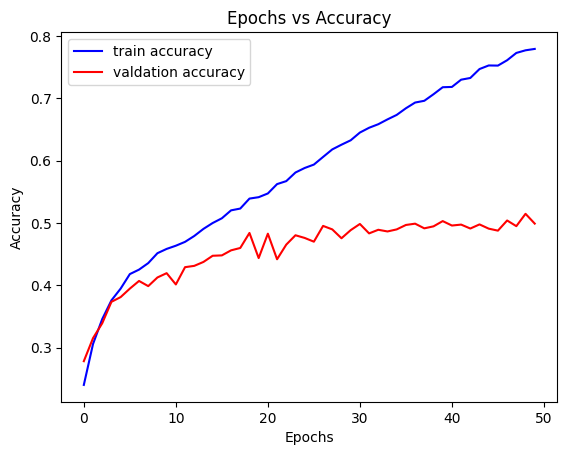

In [19]:
plt.plot(result.history['loss'],label='train loss',color='blue')
plt.plot(result.history['val_loss'],label='valdation loss',color='red')
plt.xticks(np.arange(1,50))
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Epochs vs Loss")
plt.legend()
plt.show()

plt.plot(result.history['accuracy'],label='train accuracy',color='blue')
plt.plot(result.history['val_accuracy'],label='valdation accuracy',color='red')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Epochs vs Accuracy")
plt.legend()
plt.show()